# Start from the dataset with column names, and the weights of instances have been dropped


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy
from scipy.stats import chi2_contingency
import seaborn as sns

In [ ]:
data = pd.read_excel('data/train_with_na.xlsx')
data

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 41 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   age               199523 non-null  int64 
 1   class_worker      199523 non-null  object
 2   det_ind_code      199523 non-null  int64 
 3   det_occ_code      199523 non-null  int64 
 4   education         199523 non-null  object
 5   wage_per_hour     199523 non-null  int64 
 6   hs_college        199523 non-null  object
 7   marital_stat      199523 non-null  object
 8   major_ind_code    199523 non-null  object
 9   major_occ_code    199523 non-null  object
 10  race              199523 non-null  object
 11  hisp_origin       199523 non-null  object
 12  sex               199523 non-null  object
 13  union_member      199523 non-null  object
 14  unemp_reason      199523 non-null  object
 15  full_or_part_emp  199523 non-null  object
 16  capital_gains     199523 non-null  int

#### Following is the summary for numerical features

In [10]:
data.describe()

,age,det_ind_code,det_occ_code,wage_per_hour,capital_gains,capital_losses,stock_dividends,num_emp,own_or_self,vet_benefits,weeks_worked,year
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,197.529533,1.956180,0.175438,1.514833,23.174897,94.499672
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1984.163658,2.365126,0.553694,0.851473,24.411488,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,2.000000,8.000000,94.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,6.000000,2.000000,2.000000,52.000000,95.000000


#### Detect the NA value

In [11]:
data.isna().sum()

age                     0
class_worker            0
det_ind_code            0
det_occ_code            0
education               0
wage_per_hour           0
hs_college              0
marital_stat            0
major_ind_code          0
major_occ_code          0
race                    0
hisp_origin             0
sex                     0
union_member            0
unemp_reason            0
full_or_part_emp        0
capital_gains           0
capital_losses          0
stock_dividends         0
tax_filer_stat          0
region_prev_res         0
state_prev_res        708
det_hh_fam_stat         0
det_hh_summ             0
mig_chg_msa         99696
mig_chg_reg         99696
mig_move_reg        99696
mig_same                0
mig_prev_sunbelt    99696
num_emp                 0
fam_under_18            0
country_father       6713
country_mother       6119
country_self         3393
citizenship             0
own_or_self             0
vet_question            0
vet_benefits            0
weeks_worked

### Based on the type of data, we group the categorical data and numerical data

In [12]:
cat_cols = data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=['number']).columns
data_cat = data[cat_cols]
data_num = data[num_cols]

#### Is any NA in the numerical variables

In [16]:
data_num.isna().sum()

age                0
det_ind_code       0
det_occ_code       0
wage_per_hour      0
capital_gains      0
capital_losses     0
stock_dividends    0
num_emp            0
own_or_self        0
vet_benefits       0
weeks_worked       0
year               0
dtype: int64

As we can see, there is no NA value in numerical variables, and the number of different values is given following.

In [17]:
data_num.nunique()

age                  91
det_ind_code         52
det_occ_code         47
wage_per_hour      1240
capital_gains       132
capital_losses      113
stock_dividends    1478
num_emp               7
own_or_self           3
vet_benefits          3
weeks_worked         53
year                  2
dtype: int64

#### Is any NA in the categorical variables, if so then we fill NA

In [18]:
data_cat.isna().sum()

class_worker            0
education               0
hs_college              0
marital_stat            0
major_ind_code          0
major_occ_code          0
race                    0
hisp_origin             0
sex                     0
union_member            0
unemp_reason            0
full_or_part_emp        0
tax_filer_stat          0
region_prev_res         0
state_prev_res        708
det_hh_fam_stat         0
det_hh_summ             0
mig_chg_msa         99696
mig_chg_reg         99696
mig_move_reg        99696
mig_same                0
mig_prev_sunbelt    99696
fam_under_18            0
country_father       6713
country_mother       6119
country_self         3393
citizenship             0
vet_question            0
income_50k              0
dtype: int64

* Rules: We drop the missing value if the proportion of missing value is > 30%


In [24]:
def drop_cate_na_by_proportion(df):
    NA_features_drop = df.isna().sum()[df.isna().sum() / df.shape[0] >= 0.3].index.tolist()
    df1 = df.drop(NA_features_drop, axis=1)
    return df1

In [26]:
data_cat = drop_cate_na_by_proportion(data_cat)

By contextual meaning, we find that the country_father and country_mother have less connection to the self income. We shall drop them all.

In [27]:
data_cat = data_cat.drop(['country_father', 'country_mother'], axis=1)

Check the categorical data

In [28]:
data_cat.isna().sum()

class_worker           0
education              0
hs_college             0
marital_stat           0
major_ind_code         0
major_occ_code         0
race                   0
hisp_origin            0
sex                    0
union_member           0
unemp_reason           0
full_or_part_emp       0
tax_filer_stat         0
region_prev_res        0
state_prev_res       708
det_hh_fam_stat        0
det_hh_summ            0
mig_same               0
fam_under_18           0
country_self        3393
citizenship            0
vet_question           0
income_50k             0
dtype: int64

* We fill NA by mode (i.e. high frequency)

In [29]:
data_cat['country_self'] = data_cat['country_self'].fillna(data_cat['country_self'].mode()[0])
data_cat['state_prev_res'] = data_cat['state_prev_res'].fillna(data_cat['state_prev_res'].mode()[0])

In [30]:
data_cat

,class_worker,education,hs_college,marital_stat,major_ind_code,major_occ_code,race,hisp_origin,sex,union_member,...,region_prev_res,state_prev_res,det_hh_fam_stat,det_hh_summ,mig_same,fam_under_18,country_self,citizenship,vet_question,income_50k
0,Not in universe,High school graduate,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,Not in universe under 1 year old,Not in universe,United-States,Native- Born in the United States,Not in universe,-50000
1,Self-employed-not incorporated,Some college but no degree,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,...,South,Arkansas,Householder,Householder,No,Not in universe,United-States,Native- Born in the United States,Not in universe,-50000
2,Not in universe,10th grade,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,...,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,Not in universe under 1 year old,Not in universe,Vietnam,Foreign born- Not a citizen of U S,Not in universe,-50000
3,Not in universe,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,Yes,Both parents present,United-States,Native- Born in the United States,Not in universe,-50000
4,Not in universe,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,Yes,Both parents present,United-States,Native- Born in the United States,Not in universe,-50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,Not in universe,7th and 8th grade,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,White,All other,Male,Not in universe,...,Not in universe,Not in universe,Householder,Householder,Not in universe under 1 year old,Not in universe,United-States,Native- Born in the United States,Not in universe,-50000
199519,Self-employed-incorporated,11th grade,Not in universe,Married-civilian spouse present,Business and repair services,Executive admin and managerial,White,All other,Male,Not in universe,...,Not in universe,Not in universe,Householder,Householder,Yes,Not in universe,United-States,Native- Born in the United States,Not in universe,-50000
199520,Not in universe,Some college but no degree,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,White,All other,Male,Not in universe,...,Not in universe,Not in universe,Householder,Householder,Not in universe under 1 year old,Not in universe,Germany,Foreign born- U S citizen by naturalization,Not in universe,-50000
199521,Not in universe,10th grade,High school,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,Not in universe under 1 year old,Both parents present,United-States,Native- Born in the United States,Not in universe,-50000


### Then we need to identify the 'Not in Universe', since it may cause highly imbalanced in training


### Some useful plots

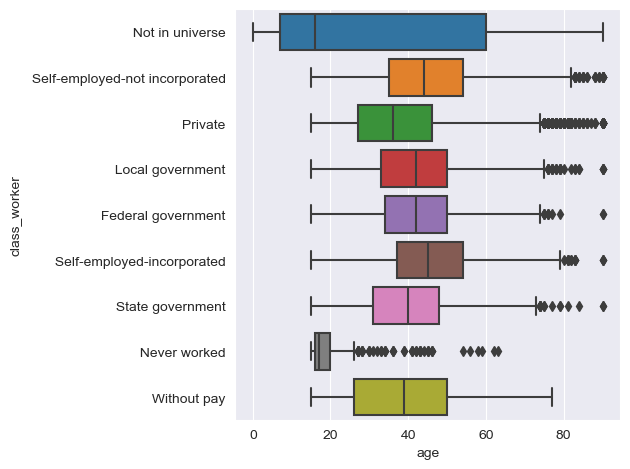

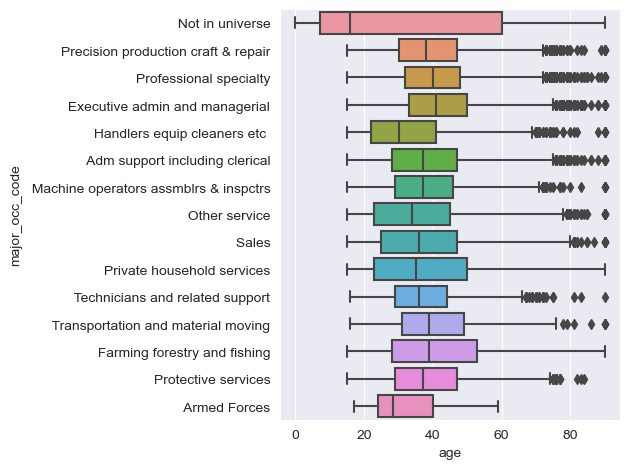

In [38]:
def plot_work_class_age(df):
    try:
        sns.boxplot(x=df['age'], y=df['class_worker'])
        plt.tight_layout()
        plt.show()
    except:
        print('No class_worker or age')
    try:
        sns.boxplot(x=df['age'], y=df['major_occ_code'])
        plt.tight_layout()
        plt.show()
    except:
        print('No major_occ_code or age')


plot_work_class_age(data)

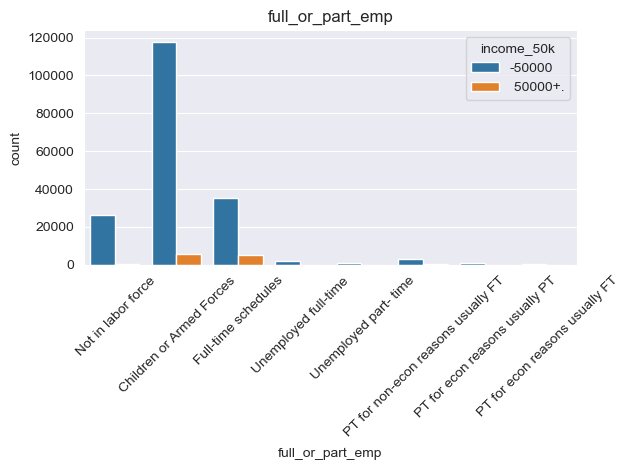

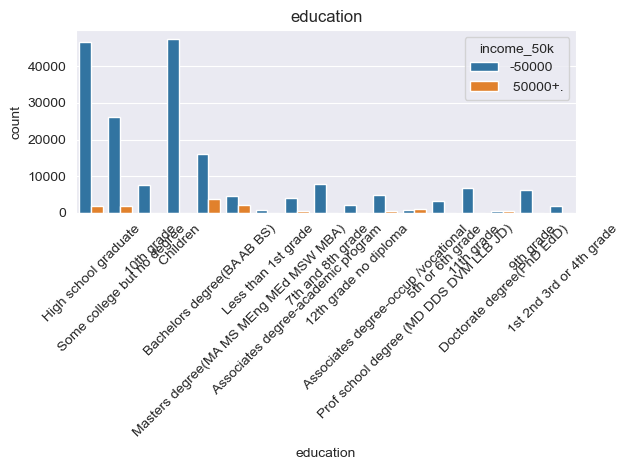

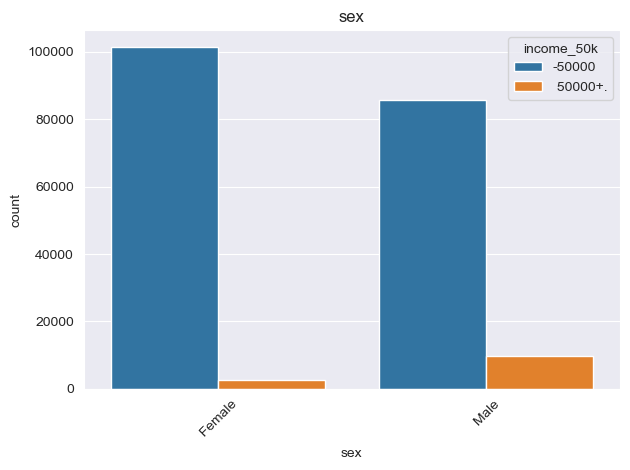

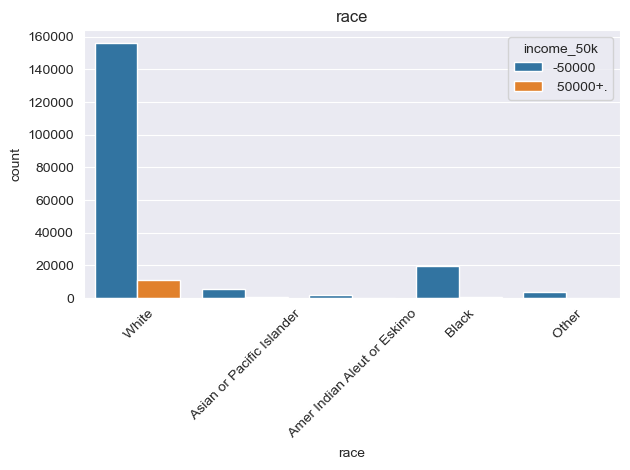

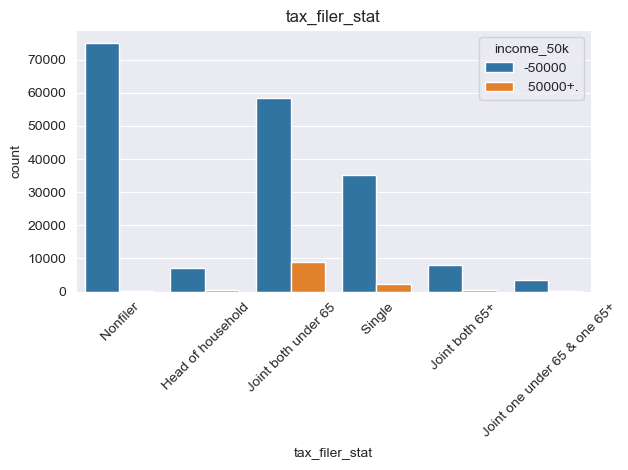

In [40]:
def plot_count_income_class(df):
    col_list = ["full_or_part_emp", "education", "sex", "race", "tax_filer_stat"]
    for col in col_list:
        sns.countplot(x=col, hue='income_50k', data=df)
        plt.title(col)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


plot_count_income_class(data_cat)

/Users/davidmao/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/Users/davidmao/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

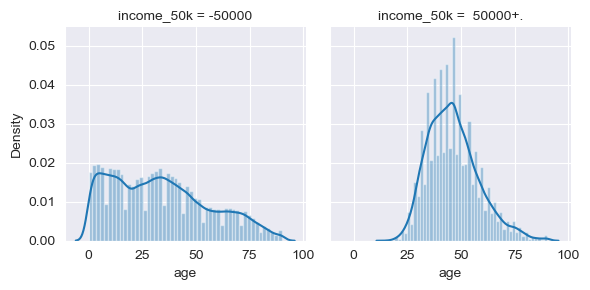

In [41]:
def plot_income_age(df):
    try:
        age_income_plot = sns.FacetGrid(df, col='income_50k')
        age_income_plot.map(sns.distplot, 'age')
        plt.tight_layout()
        plt.show()
    except:
        print('No income_50k or age')


plot_income_age(data)

/Users/davidmao/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/Users/davidmao/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

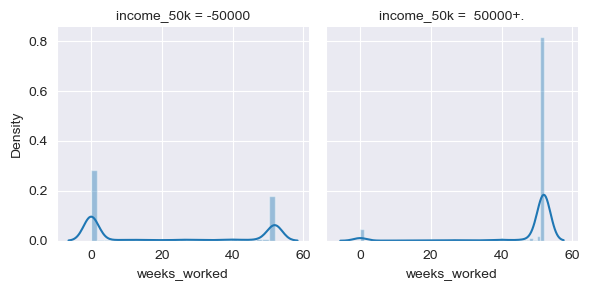

In [43]:
def plot_income_weeks_work(df):
    try:
        age_income_plot = sns.FacetGrid(df, col='income_50k')
        age_income_plot.map(sns.distplot, 'weeks_worked')
        plt.tight_layout()
        plt.show()
    except:
        print('No weeks_worked or age')


plot_income_weeks_work(data)

/Users/davidmao/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/Users/davidmao/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

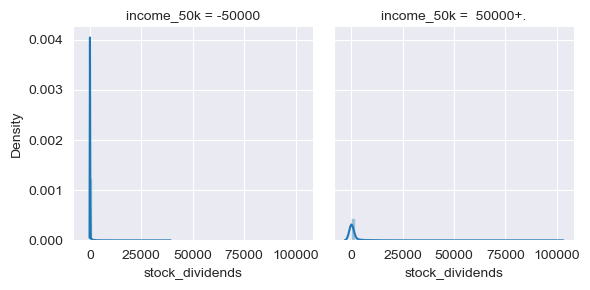

In [45]:
def plot_income_stock_div(df):
    try:
        age_income_plot = sns.FacetGrid(df, col='income_50k')
        age_income_plot.map(sns.distplot, 'stock_dividends')
        plt.tight_layout()
        plt.show()
    except:
        print('No stock_dividends or age')


plot_income_stock_div(data)

In [52]:
data[['stock_dividends', 'capital_losses', 'income_50k']]

,stock_dividends,capital_losses,income_50k
0,0,0,-50000
1,0,0,-50000
2,0,0,-50000
3,0,0,-50000
4,0,0,-50000
...,...,...,...
199518,0,0,-50000
199519,9,0,-50000
199520,157,0,-50000
199521,0,0,-50000


#### Outliers analysis?

In [53]:
def drop_outliers(df, z_thresh):
    """
    Identify and drop outliers in a dataframe based on the z-score method
    """
    df_copy = df.copy()
    z_scores = df_copy.apply(lambda x: np.abs((x - x.mean()) / x.std()))
    df_copy = df_copy[(z_scores < z_thresh).all(axis=1)]
    return df_copy

## Since some columns may provide same information, so we need to identify which colunms should be dropped, by determining there correlation with Cramer's V

### For continuous variables

* From the context, we find "det_ind_code" and "det_occ_code" in continuous features, representing the industry and occupation code, which are similar to the 'major_ind_code', 'major_occ_code' in categorical features, then we may only keep the categorical representation.

In [55]:
data_num = data_num.drop(['det_ind_code', 'det_occ_code'], axis=1)
data_num

,age,wage_per_hour,capital_gains,capital_losses,stock_dividends,num_emp,own_or_self,vet_benefits,weeks_worked,year
0,73,0,0,0,0,0,0,2,0,95
1,58,0,0,0,0,1,0,2,52,94
2,18,0,0,0,0,0,0,2,0,95
3,9,0,0,0,0,0,0,0,0,94
4,10,0,0,0,0,0,0,0,0,94
...,...,...,...,...,...,...,...,...,...,...
199518,87,0,0,0,0,0,0,2,0,95
199519,65,0,6418,0,9,1,0,2,52,94
199520,47,0,0,0,157,6,0,2,52,95
199521,16,0,0,0,0,0,0,2,0,95


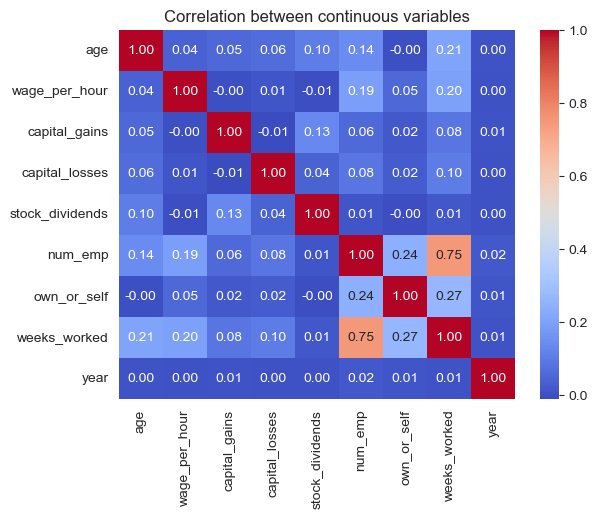

In [79]:
corr_num1 = data_num.corr()
sns.heatmap(corr_num1,annot=True, fmt = ".2f", cmap = "coolwarm")
plt.title('Correlation between continuous variables')
plt.show()

In [78]:
corr_num_helper1 = data_num[['vet_benefits', 'num_emp', 'own_or_self']].corr()
sns.heatmap(corr_num_helper1,annot=True, fmt = ".2f", cmap = "coolwarm")
plt.show()

KeyError: "['vet_benefits'] not in index"


* From the heatmap, we found that the "vet_benefits" has high correlation with the "age" and "num_emp", then we shall drop this variable
* "num_emp" to be determined LATER!!!

In [58]:
data_num = data_num.drop(['vet_benefits'], axis=1)

### For categorical variables.

* We applied Cramer's V method

In [59]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

In [64]:
corr_cate = np.zeros((len(data_cat.columns), len(data_cat.columns)))
for i, col1 in enumerate(data_cat.columns):
    for j, col2 in enumerate(data_cat.columns):
        corr_cate[i, j] = cramers_v(data_cat[col1], data_cat[col2])

corr_df_cate = pd.DataFrame(corr_cate, columns=data_cat.columns, index=data_cat.columns)

In [1]:
sns.heatmap(corr_df_cate,annot=True, fmt = ".2f", cmap = "coolwarm")
plt.title('correlation between the categorical variables')
plt.tight_layout()
plt.show()
data_cat.nunique()

NameError: name 'sns' is not defined

* Noticed that "major_ind_code" and "major_occ_code" have high correlation, "major_occ_code" has less classes, then we may drop "major_ind_code".

* Noticed that "region_prev_res" and "state_prev_res" have high correlation, "region_prev_res" has less classes, then we may drop "state_prev_res".

* Noticed that "det_hh_fam_stat" and "det_hh_summ" have high correlation, "det_hh_summ" has less classes, then we may drop "det_hh_fam_stat".

* Noticed that "country_self" and "citizenship" have high correlation, "citizenship" has less classes, then we may drop "country_self".

In [66]:
data_cat = data_cat.drop(['major_ind_code', 'state_prev_res', 'det_hh_fam_stat', 'country_self'], axis=1)

In [67]:
data_cat

,class_worker,education,hs_college,marital_stat,major_occ_code,race,hisp_origin,sex,union_member,unemp_reason,full_or_part_emp,tax_filer_stat,region_prev_res,det_hh_summ,mig_same,fam_under_18,citizenship,vet_question,income_50k
0,Not in universe,High school graduate,Not in universe,Widowed,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,Nonfiler,Not in universe,Other relative of householder,Not in universe under 1 year old,Not in universe,Native- Born in the United States,Not in universe,-50000
1,Self-employed-not incorporated,Some college but no degree,Not in universe,Divorced,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,Head of household,South,Householder,No,Not in universe,Native- Born in the United States,Not in universe,-50000
2,Not in universe,10th grade,High school,Never married,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Not in labor force,Nonfiler,Not in universe,Child 18 or older,Not in universe under 1 year old,Not in universe,Foreign born- Not a citizen of U S,Not in universe,-50000
3,Not in universe,Children,Not in universe,Never married,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,Nonfiler,Not in universe,Child under 18 never married,Yes,Both parents present,Native- Born in the United States,Not in universe,-50000
4,Not in universe,Children,Not in universe,Never married,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,Nonfiler,Not in universe,Child under 18 never married,Yes,Both parents present,Native- Born in the United States,Not in universe,-50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,Not in universe,7th and 8th grade,Not in universe,Married-civilian spouse present,Not in universe,White,All other,Male,Not in universe,Not in universe,Not in labor force,Joint both 65+,Not in universe,Householder,Not in universe under 1 year old,Not in universe,Native- Born in the United States,Not in universe,-50000
199519,Self-employed-incorporated,11th grade,Not in universe,Married-civilian spouse present,Executive admin and managerial,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,Joint one under 65 & one 65+,Not in universe,Householder,Yes,Not in universe,Native- Born in the United States,Not in universe,-50000
199520,Not in universe,Some college but no degree,Not in universe,Married-civilian spouse present,Not in universe,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,Joint both under 65,Not in universe,Householder,Not in universe under 1 year old,Not in universe,Foreign born- U S citizen by naturalization,Not in universe,-50000
199521,Not in universe,10th grade,High school,Never married,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,Nonfiler,Not in universe,Child under 18 never married,Not in universe under 1 year old,Both parents present,Native- Born in the United States,Not in universe,-50000


## We indentify whether some categorical variables is highly imbalanced

* We use the [Shannon entropy to measure balance.](https://stats.stackexchange.com/questions/239973/a-general-measure-of-data-set-imbalance)


In [69]:
def shannon_entropy(df):
    imbalance_score_dict = {}
    for col in df.columns:
        value_counts = df[col].value_counts(normalize=True)
        target_entropy = entropy(value_counts, base=2)
        max_entropy = np.log2(len(value_counts))
        imbalance_score_dict[col] = 1 - target_entropy / max_entropy
    imbalance_score_df = pd.DataFrame(data=imbalance_score_dict, index=['Imbalanced_Score']).T
    imbalance_score_df = imbalance_score_df.sort_values('Imbalanced_Score', ascending=False)
    return imbalance_score_df


shannon_entropy(data_cat)

,Imbalanced_Score
vet_question,0.944768
unemp_reason,0.899451
region_prev_res,0.781049
hs_college,0.746322
hisp_origin,0.717359
citizenship,0.707961
union_member,0.675017
income_50k,0.664439
race,0.622310
fam_under_18,0.494688


### To avoid the effect of highly imbalanced data, we shall drop ['vet_question','unemp_reason','region_prev_res','hs_college','hisp_origin'] which have high imbalanced score.

In [74]:
data_cat = data_cat.drop(['vet_question', 'unemp_reason', 'region_prev_res', 'hs_college', 'hisp_origin'], axis=1)
data_cat

,class_worker,education,marital_stat,major_occ_code,race,sex,union_member,full_or_part_emp,tax_filer_stat,det_hh_summ,mig_same,fam_under_18,citizenship,income_50k
0,Not in universe,High school graduate,Widowed,Not in universe,White,Female,Not in universe,Not in labor force,Nonfiler,Other relative of householder,Not in universe under 1 year old,Not in universe,Native- Born in the United States,-50000
1,Self-employed-not incorporated,Some college but no degree,Divorced,Precision production craft & repair,White,Male,Not in universe,Children or Armed Forces,Head of household,Householder,No,Not in universe,Native- Born in the United States,-50000
2,Not in universe,10th grade,Never married,Not in universe,Asian or Pacific Islander,Female,Not in universe,Not in labor force,Nonfiler,Child 18 or older,Not in universe under 1 year old,Not in universe,Foreign born- Not a citizen of U S,-50000
3,Not in universe,Children,Never married,Not in universe,White,Female,Not in universe,Children or Armed Forces,Nonfiler,Child under 18 never married,Yes,Both parents present,Native- Born in the United States,-50000
4,Not in universe,Children,Never married,Not in universe,White,Female,Not in universe,Children or Armed Forces,Nonfiler,Child under 18 never married,Yes,Both parents present,Native- Born in the United States,-50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,Not in universe,7th and 8th grade,Married-civilian spouse present,Not in universe,White,Male,Not in universe,Not in labor force,Joint both 65+,Householder,Not in universe under 1 year old,Not in universe,Native- Born in the United States,-50000
199519,Self-employed-incorporated,11th grade,Married-civilian spouse present,Executive admin and managerial,White,Male,Not in universe,Children or Armed Forces,Joint one under 65 & one 65+,Householder,Yes,Not in universe,Native- Born in the United States,-50000
199520,Not in universe,Some college but no degree,Married-civilian spouse present,Not in universe,White,Male,Not in universe,Children or Armed Forces,Joint both under 65,Householder,Not in universe under 1 year old,Not in universe,Foreign born- U S citizen by naturalization,-50000
199521,Not in universe,10th grade,Never married,Not in universe,White,Female,Not in universe,Not in labor force,Nonfiler,Child under 18 never married,Not in universe under 1 year old,Both parents present,Native- Born in the United States,-50000


In [75]:
for col in data_cat.columns:
    counts = data_cat[col].value_counts()
    if ' Not in universe' in counts:
        niu_proportion = counts[' Not in universe'] / data_cat.shape[0]
    elif ' Not in universe or children' in counts:
        niu_proportion = counts[' Not in universe or children'] / data_cat.shape[0]
    else:
        niu_proportion = 0
    print(col, np.round(niu_proportion, 2))

class_worker 0.5
education 0
marital_stat 0
major_occ_code 0.5
race 0
sex 0
union_member 0.9
full_or_part_emp 0
tax_filer_stat 0
det_hh_summ 0
mig_same 0
fam_under_18 0.72
citizenship 0
income_50k 0


In [76]:
data_new = pd.concat([data_num, data_cat], axis=1)
data_new

,age,wage_per_hour,capital_gains,capital_losses,stock_dividends,num_emp,own_or_self,weeks_worked,year,class_worker,...,race,sex,union_member,full_or_part_emp,tax_filer_stat,det_hh_summ,mig_same,fam_under_18,citizenship,income_50k
0,73,0,0,0,0,0,0,0,95,Not in universe,...,White,Female,Not in universe,Not in labor force,Nonfiler,Other relative of householder,Not in universe under 1 year old,Not in universe,Native- Born in the United States,-50000
1,58,0,0,0,0,1,0,52,94,Self-employed-not incorporated,...,White,Male,Not in universe,Children or Armed Forces,Head of household,Householder,No,Not in universe,Native- Born in the United States,-50000
2,18,0,0,0,0,0,0,0,95,Not in universe,...,Asian or Pacific Islander,Female,Not in universe,Not in labor force,Nonfiler,Child 18 or older,Not in universe under 1 year old,Not in universe,Foreign born- Not a citizen of U S,-50000
3,9,0,0,0,0,0,0,0,94,Not in universe,...,White,Female,Not in universe,Children or Armed Forces,Nonfiler,Child under 18 never married,Yes,Both parents present,Native- Born in the United States,-50000
4,10,0,0,0,0,0,0,0,94,Not in universe,...,White,Female,Not in universe,Children or Armed Forces,Nonfiler,Child under 18 never married,Yes,Both parents present,Native- Born in the United States,-50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,87,0,0,0,0,0,0,0,95,Not in universe,...,White,Male,Not in universe,Not in labor force,Joint both 65+,Householder,Not in universe under 1 year old,Not in universe,Native- Born in the United States,-50000
199519,65,0,6418,0,9,1,0,52,94,Self-employed-incorporated,...,White,Male,Not in universe,Children or Armed Forces,Joint one under 65 & one 65+,Householder,Yes,Not in universe,Native- Born in the United States,-50000
199520,47,0,0,0,157,6,0,52,95,Not in universe,...,White,Male,Not in universe,Children or Armed Forces,Joint both under 65,Householder,Not in universe under 1 year old,Not in universe,Foreign born- U S citizen by naturalization,-50000
199521,16,0,0,0,0,0,0,0,95,Not in universe,...,White,Female,Not in universe,Not in labor force,Nonfiler,Child under 18 never married,Not in universe under 1 year old,Both parents present,Native- Born in the United States,-50000


In [77]:
data_new.to_excel('train_data_after_EDA.xlsx',index=False)